<h1 align="center">Lab 5</h1>

<h2>Imports and Stuff</h2>

In [140]:
import numpy as np
import matplotlib.pyplot as plt
import copy
import math
from skimage import morphology
from skimage.color import rgb2gray
from PIL import Image

#Displays an image
def displayImage(image,max):
    plt.gray()
    plt.imshow(image, vmin=0, vmax=max)
    plt.show()
    plt.axis("off")
    
#Convert float to uint8
def im2int8(image):
    image = image.astype(np.float32)
    image = 255 * image
    image = image.astype(np.uint8)
    return image

#Converts an image to float32
def im2float32(image):
    type = image.dtype
    if np.issubdtype(type, np.integer):
        info = np.iinfo(image.dtype)
        image = image.astype(np.float32) / info.max
    return image


<h2>Lab Questions</h2>

<b>Question 1: </b>Given image ‘left’, apply appropriate morphological operators to eliminate the smaller squares.

Original Image



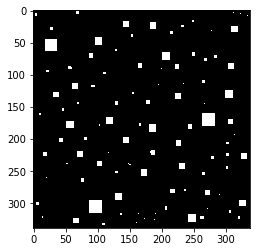

B

[[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]]
Eroded Image



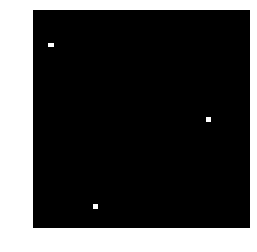

Eroded and then Dilated Image



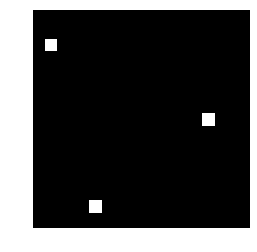

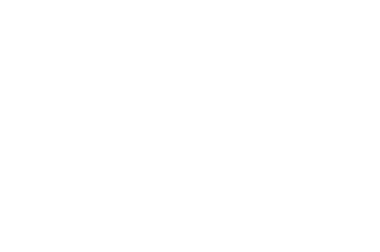

In [141]:
left = plt.imread("left.tif")
print("Original Image\n")
displayImage(left,1)

B = np.ones((13,13))
print("B\n")
print(B)

left_erode = morphology.binary_erosion(left,B)
print("Eroded Image\n")
displayImage(left_erode,1)

left_erode_dilate = morphology.binary_dilation(left_erode,B)
print("Eroded and then Dilated Image\n")
displayImage(left_erode_dilate,1)

<b>Question 2: </b>Given image ‘wirebond-mask’, how would you extract the large square in the middle?

Erode and then dilate

Original Image



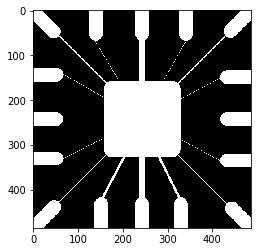

Eroded Image



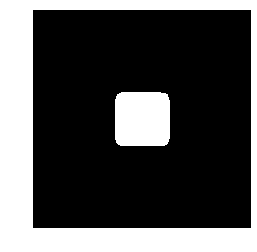

Dilated Image



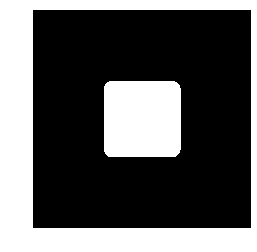

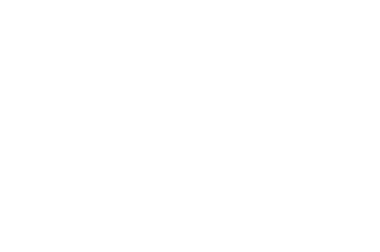

In [142]:
wirebond = Image.open("wirebond-mask.tif") # open colour image
wirebond = np.asarray(wirebond)
print("Original Image\n")
displayImage(wirebond,1)

B = np.ones((50,50))

wirebond2 = morphology.binary_erosion(wirebond,B)
print("Eroded Image\n")
displayImage(wirebond2,1)

wirebond3 = morphology.binary_dilation(wirebond2,B)
print("Dilated Image\n")
displayImage(wirebond3,1)


<b>Question 3: </b>Apply opening and closing to image ‘phantom’ using different structuring elements and analyze the difference.

Original Image



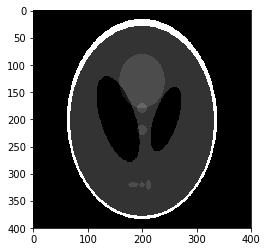

Opening and Closing with Disk


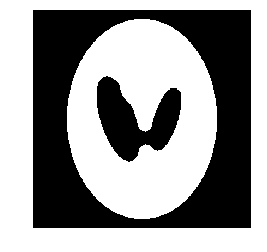

Opening and Closing with Square


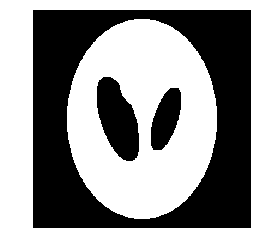

Opening and Closing with Rectangle


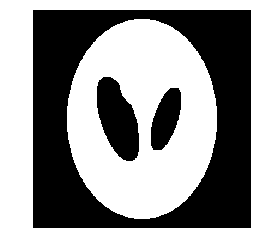

Opening and Closing with Diamond


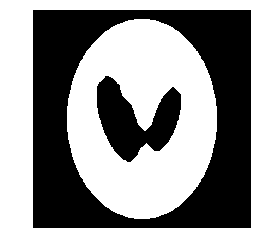

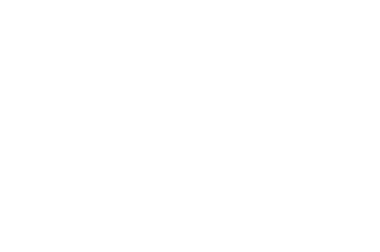

In [154]:
phantom = Image.open("phantom.png") # open colour image
phantom = np.asarray(phantom)
phantom = rgb2gray(phantom)
print("Original Image\n")
displayImage(phantom,1)

mySize = 13

Bdisk = morphology.disk(mySize)
Bsquare = morphology.square(mySize)
Brectangle = morphology.rectangle(mySize*2,mySize)
Bdiamond = morphology.diamond(mySize)

print("Opening and Closing with Disk")
phantom2 = morphology.binary_opening(phantom,Bdisk)
phantom2 = morphology.binary_closing(phantom2,Bdisk)
displayImage(phantom2,1)

print("Opening and Closing with Square")
phantom3 = morphology.binary_opening(phantom,Bsquare)
phantom3 = morphology.binary_closing(phantom3,Bsquare)
displayImage(phantom3,1)

print("Opening and Closing with Rectangle")
phantom4 = morphology.binary_opening(phantom,Brectangle)
phantom4 = morphology.binary_closing(phantom4,Brectangle)
displayImage(phantom4,1)

print("Opening and Closing with Diamond")
phantom5 = morphology.binary_opening(phantom,Bdiamond)
phantom5 = morphology.binary_closing(phantom5,Bdiamond)
displayImage(phantom5,1)

<b>Question 4: </b>Extract the boundary of image ‘lincoln’ using morphological operators.

Original Image



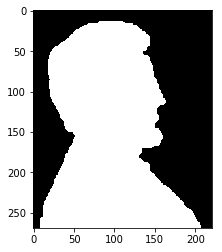

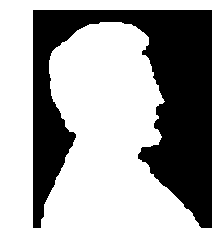

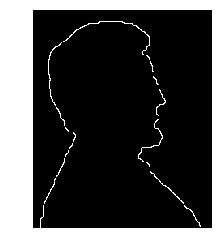

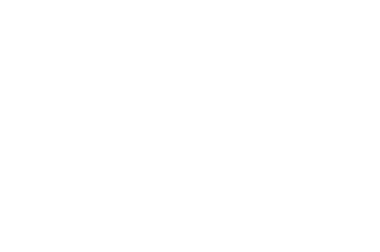

In [159]:
lincoln = Image.open("lincoln.tif") # open colour image
lincoln = np.asarray(lincoln)
lincoln = rgb2gray(lincoln)
print("Original Image\n")
displayImage(lincoln,1)

B = np.ones((3,3))

lincoln2 = morphology.binary_erosion(lincoln,B)
displayImage(lincoln2,1)

lincoln3 = lincoln^lincoln2
displayImage(lincoln3,1)

<b>Question 5: </b>Extract the skeleton of image ‘leg_bone’.

Original Image



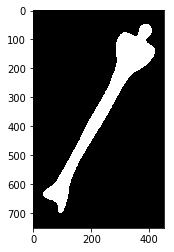

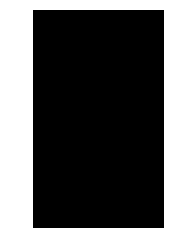

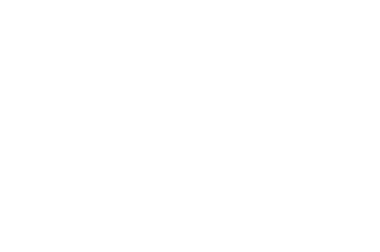

In [176]:
bone = Image.open("leg_bone.tif") # open colour image
bone = np.asarray(bone)
bone = rgb2gray(bone)
print("Original Image\n")
displayImage(bone,1)

B = morphology.disk(3)

sets = []

#TODO

s0 = np.logical_and(bone,np.logical_not(morphology.binary_opening(bone,B)))
displayImage(np.logical_and(bone,np.logical_not(morphology.binary_opening(bone,B))),1)